# Exploratory analysis 2

Kaggle competition https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting

In [51]:
import pylab as py
import pandas as pandas
%matplotlib inline
import datetime
import seaborn as sns

In [2]:
data_reserve_air = pandas.read_csv('Data/air_reserve.csv')
data_reserve_hpg = pandas.read_csv('Data/hpg_reserve.csv')
data_store_air = pandas.read_csv('Data/air_store_info.csv')
data_store_hpg = pandas.read_csv('Data/hpg_store_info.csv')
data_visit = pandas.read_csv('Data/air_visit_data.csv')
data_store_relations = pandas.read_csv('Data/store_id_relation.csv')
data_testset = pandas.read_csv('Data/sample_submission.csv')

Combining information about stores into reservations and visits data.

In [3]:
data_reserve_air = data_reserve_air.merge(data_store_air, how='left', on='air_store_id')
data_reserve_air.rename({'latitude': 'air_latitude', 'longitude': 'air_longitude'}, axis=1, inplace=True)
data_reserve_hpg = data_reserve_hpg.merge(data_store_hpg, how='left', on='hpg_store_id')
data_reserve_hpg.rename({'latitude': 'hpg_latitude', 'longitude': 'hpg_longitude'}, axis=1, inplace=True)
data_visit = data_visit.merge(data_store_air, how='left', on='air_store_id')
data_visit.rename({'latitude': 'air_latitude', 'longitude': 'air_longitude'}, axis=1, inplace=True)

In [4]:
data_reserve_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92378 entries, 0 to 92377
Data columns (total 8 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null object
reserve_datetime    92378 non-null object
reserve_visitors    92378 non-null int64
air_genre_name      92378 non-null object
air_area_name       92378 non-null object
air_latitude        92378 non-null float64
air_longitude       92378 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.3+ MB


In [5]:
data_visit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252108 entries, 0 to 252107
Data columns (total 7 columns):
air_store_id      252108 non-null object
visit_date        252108 non-null object
visitors          252108 non-null int64
air_genre_name    252108 non-null object
air_area_name     252108 non-null object
air_latitude      252108 non-null float64
air_longitude     252108 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.4+ MB


In [6]:
data_reserve_hpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000320 entries, 0 to 2000319
Data columns (total 8 columns):
hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors    int64
hpg_genre_name      object
hpg_area_name       object
hpg_latitude        float64
hpg_longitude       float64
dtypes: float64(2), int64(1), object(5)
memory usage: 137.4+ MB


Preparing information about test set.

In [7]:
data_testset['air_store_id'] = data_testset['id'].apply(lambda x: x[:20])
data_testset['visit_date'] = data_testset['id'].apply(lambda x: x[21:])
data_testset = data_testset.merge(data_store_air, how='left', on='air_store_id')

## Combining information about stores on both systems


In [8]:
data_reserve_air = data_reserve_air.merge(data_store_relations, how='left', on='air_store_id')
data_reserve_air = data_reserve_air.merge(data_store_hpg, how='left', on='hpg_store_id')
data_reserve_air.rename({'latitude': 'hpg_latitude', 'longitude': 'hpg_longitude'}, axis=1, inplace=True)

In [9]:
data_reserve_hpg = data_reserve_hpg.merge(data_store_relations, how='left', on='hpg_store_id')
data_reserve_hpg = data_reserve_hpg.merge(data_store_air, how='left', on='air_store_id')
data_reserve_hpg.rename({'latitude': 'air_latitude', 'longitude': 'air_longitude'}, axis=1, inplace=True)

In [10]:
data_visit = data_visit.merge(data_store_relations, how='left', on='air_store_id')
data_visit = data_visit.merge(data_store_hpg, how='left', on='hpg_store_id')
data_visit.rename({'latitude': 'hpg_latitude', 'longitude': 'hpg_longitude'}, axis=1, inplace=True)

In [11]:
data_reserve_hpg.count()

hpg_store_id        2000320
visit_datetime      2000320
reserve_datetime    2000320
reserve_visitors    2000320
hpg_genre_name       871308
hpg_area_name        871308
hpg_latitude         871308
hpg_longitude        871308
air_store_id          28183
air_genre_name        28183
air_area_name         28183
air_latitude          28183
air_longitude         28183
dtype: int64

In [12]:
data_reserve_air.count()

air_store_id        92378
visit_datetime      92378
reserve_datetime    92378
reserve_visitors    92378
air_genre_name      92378
air_area_name       92378
air_latitude        92378
air_longitude       92378
hpg_store_id        36264
hpg_genre_name      16154
hpg_area_name       16154
hpg_latitude        16154
hpg_longitude       16154
dtype: int64

In [13]:
data_visit.count()

air_store_id      252108
visit_date        252108
visitors          252108
air_genre_name    252108
air_area_name     252108
air_latitude      252108
air_longitude     252108
hpg_store_id       46019
hpg_genre_name     20098
hpg_area_name      20098
hpg_latitude       20098
hpg_longitude      20098
dtype: int64

In [14]:
reserve_byAIR_both = data_reserve_air.count()['hpg_genre_name']
reserve_byAIR_onlyAIR = data_reserve_air.count()['air_genre_name'] - reserve_byAIR_both
reserve_byHPG_both = data_reserve_hpg.count()['hpg_genre_name']
reserve_byHPG_onlyHPG = data_reserve_air.count()['air_genre_name'] - reserve_byAIR_both

In [17]:
reserve_byAIR_both = data_reserve_air[(~py.isnan(data_reserve_air['air_latitude']))&(~py.isnan(data_reserve_air['hpg_latitude']))]
reserve_byAIR_onlyHPG = data_reserve_air[(py.isnan(data_reserve_air['air_latitude']))&(~py.isnan(data_reserve_air['hpg_latitude']))]
reserve_byAIR_onlyAIR = data_reserve_air[(~py.isnan(data_reserve_air['air_latitude']))&(py.isnan(data_reserve_air['hpg_latitude']))]
reserve_byAIR_neither = data_reserve_air[(py.isnan(data_reserve_air['air_latitude']))&(py.isnan(data_reserve_air['hpg_latitude']))]
reserve_byHPG_both = data_reserve_hpg[(~py.isnan(data_reserve_hpg['air_latitude']))&(~py.isnan(data_reserve_hpg['hpg_latitude']))]
reserve_byHPG_onlyHPG = data_reserve_hpg[(py.isnan(data_reserve_hpg['air_latitude']))&(~py.isnan(data_reserve_hpg['hpg_latitude']))]
reserve_byHPG_onlyAIR = data_reserve_hpg[(~py.isnan(data_reserve_hpg['air_latitude']))&(py.isnan(data_reserve_hpg['hpg_latitude']))]
reserve_byHPG_neither = data_reserve_hpg[(py.isnan(data_reserve_hpg['air_latitude']))&(py.isnan(data_reserve_hpg['hpg_latitude']))]


In [19]:
print('Number of reservations and store information:')
total = len(data_reserve_hpg) + len(data_reserve_air)
this = len(reserve_byHPG_both)
print('{:7d} ({:4.1f} %) reservations with store information from HPG and AIR, made by HPG'.format(this, this/total*100))
this = len(reserve_byAIR_both)
print('{:7d} ({:4.1f} %) reservations with store information from HPG and AIR, made by AIR'.format(this, this/total*100))
this = len(reserve_byHPG_onlyAIR)
print('{:7d} ({:4.1f} %) reservations with store information from AIR only, made by HPG'.format(this, this/total*100))
this = len(reserve_byAIR_onlyAIR)
print('{:7d} ({:4.1f} %) reservations with store information from AIR only, made by AIR'.format(this, this/total*100))
this = len(reserve_byHPG_onlyHPG)
print('{:7d} ({:4.1f} %) reservations with store information from HPG only, made by HPG'.format(this, this/total*100))
this = len(reserve_byAIR_onlyHPG)
print('{:7d} ({:4.1f} %) reservations with store information from HPG only, made by AIR'.format(this, this/total*100))
this = len(reserve_byHPG_neither)
print('{:7d} ({:4.1f} %) reservations with no store information, made by HPG'.format(this, this/total*100))
this = len(reserve_byAIR_neither)
print('{:7d} ({:4.1f} %) reservations with no store information, made by AIR'.format(this, this/total*100))

Number of reservations and store information:
  13528 ( 0.6 %) reservations with store information from HPG and AIR, made by HPG
  16154 ( 0.8 %) reservations with store information from HPG and AIR, made by AIR
  14655 ( 0.7 %) reservations with store information from AIR only, made by HPG
  76224 ( 3.6 %) reservations with store information from AIR only, made by AIR
 857780 (41.0 %) reservations with store information from HPG only, made by HPG
      0 ( 0.0 %) reservations with store information from HPG only, made by AIR
1114357 (53.2 %) reservations with no store information, made by HPG
      0 ( 0.0 %) reservations with no store information, made by AIR


# Time-series data

In [69]:
def convert_date_to_int(date_string):
    date = datetime.datetime.strptime(date_string[0:10],'%Y-%m-%d')
    start = datetime.date(2016,1,1)
    return (date.date() - start).days

Text(0,0.5,'Number of visitors')

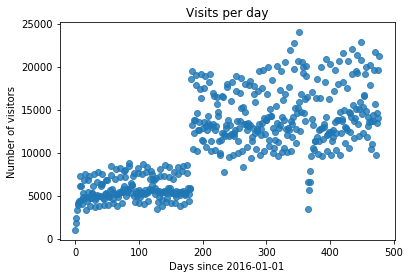

In [79]:
plot = data_visit.groupby('visit_date',as_index=False).sum()
plot['x_plot'] = plot['visit_date'].apply(convert_date_to_int)
ax = sns.regplot(x='x_plot', y='visitors', data=plot, fit_reg=False)
ax.set_title('Visits per day');
ax.set_xlabel('Days since 2016-01-01')
ax.set_ylabel('Number of visitors')

Text(0,0.5,'Number of visitors')

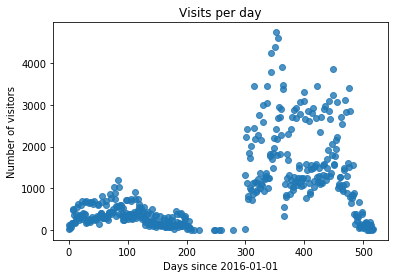

In [84]:
data_reserve_air['visit_date'] = data_reserve_air['visit_datetime'].apply(lambda x:x[:10])
plot = data_reserve_air.groupby('visit_date',as_index=False).sum()
plot['x_plot'] = plot['visit_date'].apply(convert_date_to_int)
ax = sns.regplot(x='x_plot', y='reserve_visitors', data=plot, fit_reg=False)
ax.set_title('Visits per day');
ax.set_xlabel('Days since 2016-01-01')
ax.set_ylabel('Number of visitors')

Text(0,0.5,'Number of visitors')

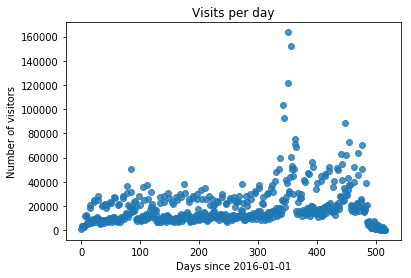

In [85]:
data_reserve_hpg['visit_date'] = data_reserve_hpg['visit_datetime'].apply(lambda x:x[:10])
plot = data_reserve_hpg.groupby('visit_date',as_index=False).sum()
plot['x_plot'] = plot['visit_date'].apply(convert_date_to_int)
ax = sns.regplot(x='x_plot', y='reserve_visitors', data=plot, fit_reg=False)
ax.set_title('Visits per day');
ax.set_xlabel('Days since 2016-01-01')
ax.set_ylabel('Number of visitors')